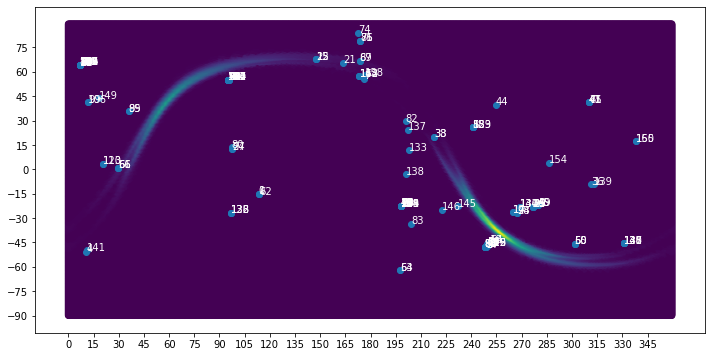

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
probmap = pd.read_csv('probmap.csv')

df = pd.DataFrame()
file = open('data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes
df = df[df['mode'] == 'PHOTON'].sort_values(by=['start time'])

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticks(np.arange(0, 360, 15))
ax.set_yticks(np.arange(-90, 90, 15))
ax.scatter(probmap['ra'], probmap['dec'], c=probmap['prob'])
ax.scatter(df['ra'], df['dec'])
for i in np.arange(df.shape[0]):
    ax.annotate(i, (df['ra'].tolist()[i], df['dec'].tolist()[i]), color='white')

In [2]:
df.iloc[38]

targetid                      35307
obsid                   00035307041
ra                          218.056
dec                         19.9433
start time    2017-08-22 11:28:47.6
mode                         PHOTON
Name: 233, dtype: object

In [5]:
from shutil import copyfile
import os
subset = df[(df.ra<255) & (df.ra>240) & (df.dec > -60) & (df.dec < -45)]

c = 0
for i, row in subset.iterrows():
    targetid = row['targetid']
    dirs = os.listdir('.')
    for dir in dirs:
        if str(targetid) in dir:
            files = os.listdir(dir+'/xrt/event/')
            for file in files:
                if 'pc' in file and 'cl' in file:
                    copyfile(dir+'/xrt/event/'+file, 'events/'+str(c)+'_'+dir+'_'+file)
                    print(dir+'_'+file+'_'+str(c))
                    c += 1

00087455001_sw00087455001xpcw3po_cl.evt.gz_0
00087455001_sw00087455001xpcw3po_cl.evt.gz_1
00087455001_sw00087455001xpcw3po_cl.evt.gz_2
00087454003_sw00087454003xpcw3po_cl.evt.gz_3
00087454003_sw00087454003xpcw3po_cl.evt.gz_4
00087456001_sw00087456001xpcw3po_cl.evt.gz_5
00087456001_sw00087456001xpcw3po_cl.evt.gz_6
00087456001_sw00087456001xpcw3po_cl.evt.gz_7
00087456001_sw00087456001xpcw3po_cl.evt.gz_8
00087456001_sw00087456001xpcw3po_cl.evt.gz_9
00087451003_sw00087451003xpcw3po_cl.evt.gz_10
00087451003_sw00087451003xpcw3po_cl.evt.gz_11
00087451003_sw00087451003xpcw3po_cl.evt.gz_12
00087451003_sw00087451003xpcw3po_cl.evt.gz_13
